# Gamelytics: Mobile Analytics Challenge

## Введение

В условиях стремительного развития мобильных игр аналитика становится неотъемлемой частью успешного управления игровыми продуктами. Проект **"Gamelytics: Mobile Analytics Challenge"** предоставляет реальный набор данных, который охватывает различные аспекты взаимодействия пользователей с мобильной игрой. Этот датасет позволяет получить глубокое понимание поведения игроков, оценить результаты A/B тестов и разработать метрики для оценки эффективности игровых событий.

Проект разделён на три ключевых задачи:
- **Задача 1: Анализ удержания пользователей** – вычисление ежедневного уровня удержания (retention rate), начиная с момента регистрации пользователя.
- **Задача 2: A/B тестирование рекламных предложений** – сравнение ключевых показателей доходности (ARPU, конверсия в платящих пользователей) для определения оптимального набора промо-предложений.
- **Задача 3: Оценка эффективности мероприятия "Растения и Сады"** – разработка метрик для временного игрового события, включающего получение уникальных наград, с учётом вариации, где за неудачные попытки применяется штраф (откат на уровень назад).

## Цели проекта

Основными целями данного проекта являются:
- **Анализ поведения пользователей:** Выявить закономерности, характерные для мобильной игры, начиная с момента регистрации и заканчивая вовлечением в специальные игровые события.
- **Оценка эффективности промо-акций:** Определить, какие рекламные предложения наиболее эффективны с точки зрения привлечения дохода и конверсии платящих пользователей.
- **Разработка метрик для игровых событий:** Создать и адаптировать ключевые показатели эффективности (KPI) для временных событий, а также оценить влияние изменений в механике (например, введение штрафов) на вовлечённость и удержание игроков.

## Задачи проекта

Для достижения поставленных целей требуется выполнить следующие задачи:

1. **Retention Analysis (Анализ удержания):**  
   - Загрузить данные о регистрации (reg_data.csv) и данных об авторизациях (auth_data.csv).
   - Разработать функцию на Python для расчёта ежедневного уровня удержания, начиная с даты регистрации.

2. **A/B Testing для промо-предложений:**  
   - Анализировать данные из ab_test.csv, включающие user_id, revenue и принадлежность к тестовой или контрольной группе.
   - Вычислить ключевые метрики, такие как ARPU, конверсия в платящих пользователей.
   - Провести A/B тестирование с целью выбора лучшего набора промо-предложений.

3. **Оценка эффективности мероприятия "Растения и Сады":**  
   - Разработать базовые метрики: уровень участия, конверсия, коэффициент получения наград и время вовлечённости.
   - В случае внедрения штрафного механизма (откат на уровень после неудачных попыток) адаптировать метрики, добавив: частоту штрафов, среднюю тяжесть штрафа, влияние на конверсию и отток игроков.

## Гипотезы

В рамках проекта формулируются следующие гипотезы:

1. **Гипотеза удержания:**  
   - _H0:_ Никаких существенных изменений в ежедневном удержании пользователей не наблюдается.  
   - _H1:_ Существует значимое снижение или повышение уровня удержания, зависящее от временных факторов.
2. **Гипотеза для промо-предложений (A/B тестирование):**  
   - _H0:_ Нет различий в основных доходных метриках (ARPU, конверсии в платящих) между тестовой и контрольной группами.  
   - _H1:_ Тестовая группа демонстрирует статистически значимое улучшение ключевых метрик (например, на 5% выше ARPU), что указывает на эффективность выбранных промо-предложений.

## Заключение

В результате выполнения данного проекта будет получено глубокое понимание динамики поведения игроков в мобильной игре. Анализ retention, A/B тестирование промо-предложений и оценка эффективности игровых событий помогут не только выявить успешные стратегии монетизации, но и оптимизировать игровые механики для повышения вовлечённости и удовлетворённости пользователей. Такой комплексный подход позволит принимать обоснованные решения для дальнейшего развития продукта и увеличения доходности.

# 1. Знакомство с данными, рассчет Retention

In [935]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [936]:
reg_data = pd.read_csv('C:/Users/User/DS projects/gameanalytics/data/reg_data.csv', sep = ';')
auth_data = pd.read_csv('C:/Users/User/DS projects/gameanalytics/data/auth_data.csv', sep = ';')

reg_data

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5
...,...,...
999995,1600874034,1110618
999996,1600874086,1110619
999997,1600874139,1110620
999998,1600874191,1110621


In [949]:
reg_data.info()
auth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   reg_ts  1000000 non-null  int64
 1   uid     1000000 non-null  int64
dtypes: int64(2)
memory usage: 15.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601013 entries, 0 to 9601012
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   auth_ts  int64
 1   uid      int64
dtypes: int64(2)
memory usage: 146.5 MB


In [951]:
reg_data.isnull().sum()
auth_data.isnull().sum()

auth_ts    0
uid        0
dtype: int64

Кочичество записей в двух датасетах 1 млн, null-значения отсутствуют.

Далее необходимо перевести время в формат datetime.

In [953]:
reg_data['reg_ts'] = pd.to_datetime(reg_data['reg_ts'], unit = 's', utc = True)
auth_data['auth_ts'] = pd.to_datetime(auth_data['auth_ts'], unit = 's', utc = True)

reg_data

,reg_ts,uid
0,1998-11-18 09:43:43+00:00,1
1,1999-07-22 22:38:09+00:00,2
2,2000-01-13 22:27:27+00:00,3
3,2000-05-28 14:19:01+00:00,4
4,2000-09-16 11:21:53+00:00,5
...,...,...
999995,2020-09-23 15:13:54+00:00,1110618
999996,2020-09-23 15:14:46+00:00,1110619
999997,2020-09-23 15:15:39+00:00,1110620
999998,2020-09-23 15:16:31+00:00,1110621


Создаем таблицу с рассчетом количества пользователей по годам и ежегодным темпом прироста.

In [955]:
reg_data['reg_year'] = reg_data['reg_ts'].dt.year
auth_data['auth_year'] = auth_data['auth_ts'].dt.year

users_per_year = auth_data.groupby(auth_data['auth_year'])['uid'].nunique().reset_index(name='active_users')
users_per_year['growth_rate'] = round(users_per_year['active_users'].pct_change() * 100, 2)
users_per_year['growth_rate'].fillna(0, inplace=True)

users_per_year

,auth_year,active_users,growth_rate
0,1998,1,0.00
1,1999,1,0.00
2,2000,5,400.00
3,2001,7,40.00
4,2002,11,57.14
5,2003,21,90.91
6,2004,37,76.19
7,2005,66,78.38
8,2006,122,84.85
9,2007,227,86.07


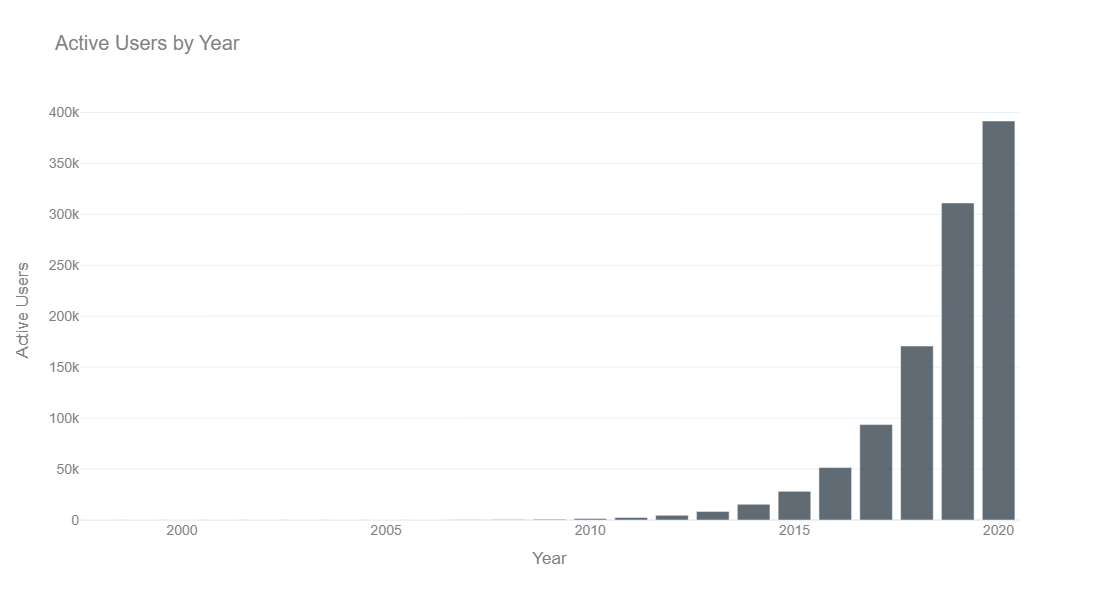

In [957]:
fig_active_users = go.Figure()
fig_active_users.add_trace(go.Bar(
    x=users_per_year['auth_year'],
    y=users_per_year['active_users'],
    marker_color='rgba(58, 71, 80, 0.8)',
    name='Active Users'
))

fig_active_users.update_layout(
    title='Active Users by Year',
    xaxis_title='Year',
    yaxis_title='Active Users',
    template='plotly_white',
    font=dict(
        family="Arial, sans-serif",
        size=14,
        color="Gray"
    ),
    height=600
)

График показывает, что число пользователей с каждым годом учелечивается примерно в 1,5 - 2 раза. Данные за 2020 год представлены только до 23 сентября.

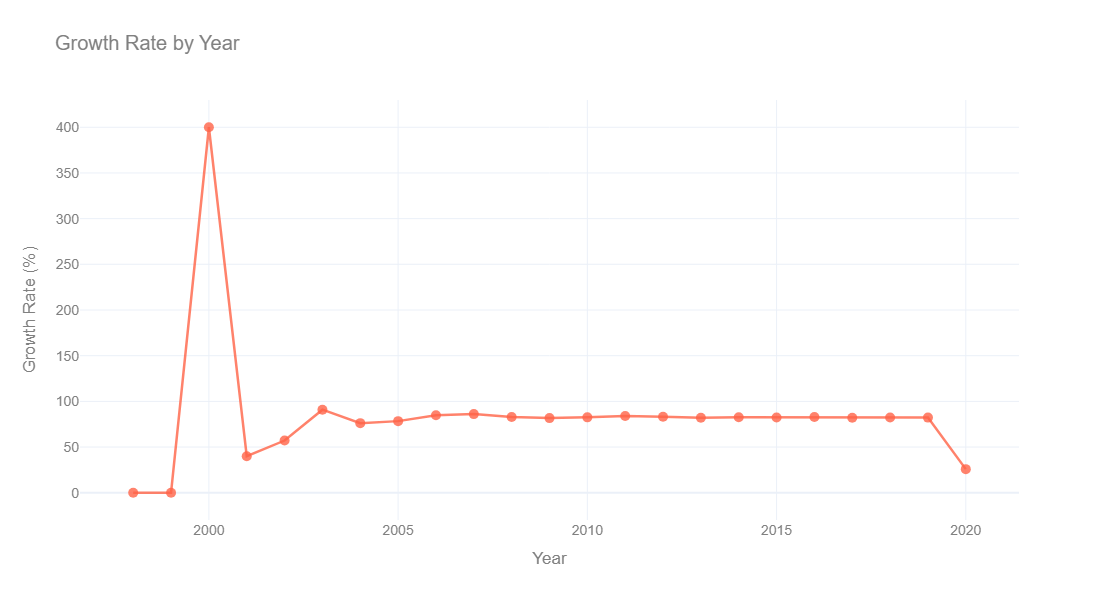

In [959]:
fig_growth_rate = go.Figure()
fig_growth_rate.add_trace(go.Scatter(
    x=users_per_year['auth_year'],
    y=users_per_year['growth_rate'],
    mode='lines+markers',
    marker=dict(color='rgba(255, 99, 71, 0.8)', size=10),
    line=dict(color='rgba(255, 99, 71, 0.8)', width=2.5),
    name='Growth Rate',
    hovertemplate='Year: %{x}<br>Growth Rate: %{y:.2f}%'
))

fig_growth_rate.update_layout(
    title='Growth Rate by Year',
    xaxis_title='Year',
    yaxis_title='Growth Rate (%)',
    template='plotly_white',
    font=dict(
        family="Arial, sans-serif",
        size=14,
        color="Gray"
    ),
    height=600
)

fig_growth_rate.show()

Ежегодный темп прироста с 2004 по 2019 год стабильный, в районе 76 - 84 %. Так как данные за 2020 год неполные, темпы роста значительно снизились.

Далее будут сджойнены датасеты reg_ts и auth_ts для создания сводной таблицы по среднему удержанию пользователей за весь период.

In [961]:
reg_data['reg_ts'] = pd.to_datetime(reg_data['reg_ts'], unit='s',  utc=True)
auth_data['auth_ts'] = pd.to_datetime(auth_data['auth_ts'], unit='s',  utc=True)

data = pd.merge(auth_data, reg_data, on='uid', how='inner')
data['days_since_reg'] = (data['auth_ts'] - data['reg_ts']).dt.days
data

,auth_ts,uid,auth_year,reg_ts,reg_year,days_since_reg
0,1998-11-18 09:43:43+00:00,1,1998,1998-11-18 09:43:43+00:00,1998,0
1,1999-07-22 22:38:09+00:00,2,1999,1999-07-22 22:38:09+00:00,1999,0
2,1999-07-25 16:46:46+00:00,2,1999,1999-07-22 22:38:09+00:00,1999,2
3,1999-07-31 03:50:15+00:00,2,1999,1999-07-22 22:38:09+00:00,1999,8
4,1999-08-05 17:49:39+00:00,2,1999,1999-07-22 22:38:09+00:00,1999,13
...,...,...,...,...,...,...
9601008,2020-09-23 15:13:54+00:00,1110618,2020,2020-09-23 15:13:54+00:00,2020,0
9601009,2020-09-23 15:14:46+00:00,1110619,2020,2020-09-23 15:14:46+00:00,2020,0
9601010,2020-09-23 15:15:39+00:00,1110620,2020,2020-09-23 15:15:39+00:00,2020,0
9601011,2020-09-23 15:16:31+00:00,1110621,2020,2020-09-23 15:16:31+00:00,2020,0


In [963]:
retention_table = data.pivot_table(index='days_since_reg', values='uid', aggfunc=pd.Series.nunique).reset_index()
retention_table = retention_table.rename(columns={'uid': 'num_users'})

retention_table

,days_since_reg,num_users
0,0,1000000
1,1,40202
2,2,42991
3,3,49152
4,4,56070
...,...,...
5911,7715,1
5912,7719,1
5913,7720,1
5914,7726,1


In [965]:
total_users = len(reg_data)
retention_table['retention_rate'] = (retention_table['num_users'] / total_users) * 100
retention_table = retention_table.iloc[1:]

retention_table

,days_since_reg,num_users,retention_rate
1,1,40202,4.0202
2,2,42991,4.2991
3,3,49152,4.9152
4,4,56070,5.6070
5,5,63713,6.3713
...,...,...,...
5911,7715,1,0.0001
5912,7719,1,0.0001
5913,7720,1,0.0001
5914,7726,1,0.0001


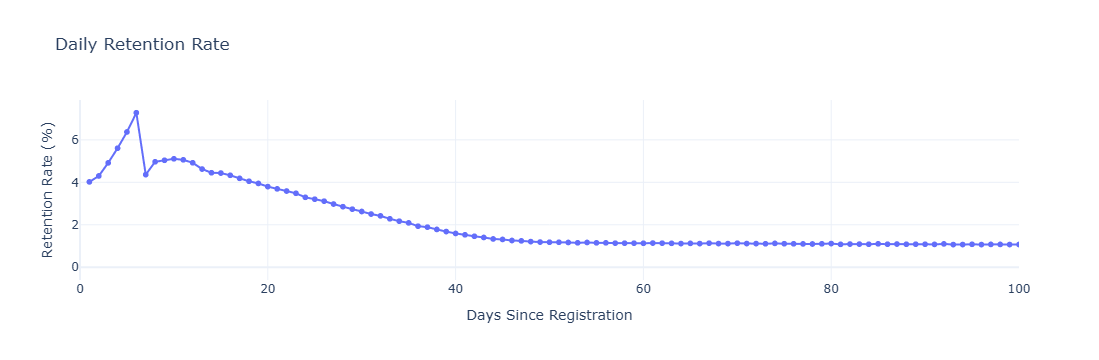

In [967]:
fig = px.line(retention_table, x='days_since_reg', y='retention_rate', markers=True, title='Daily Retention Rate')

fig.update_layout(
    xaxis=dict(range=[0, 100]),
    xaxis_title='Days Since Registration',
    yaxis_title='Retention Rate (%)',
    template='plotly_white'
)

fig.update_traces(hovertemplate='Days: %{x}<br>Retention Rate: %{y:.2f}%')

fig.show()

# Анализ Retention:

По результатам проведённого анализа наблюдается, что максимальный **retention** (удержание пользователей) достигается на 6-й день после регистрации. После этого дня метрика постепенно снижается. Ниже представлены возможные причины такого явления и рекомендации для дальнейшего исследования.

---

## Возможные Объяснения

1. **Эффект адаптации и исследования игры:**
   - **Первые дни:** Пользователи активно знакомятся с игрой, тестируют разные функции, изучают механику и возможности.
   - **К 6-му дню:** Уже формируется база «заинтересованных» пользователей, а менее мотивированные игроки, не нашедшие в игре достаточно интересного, постепенно отпадают.

2. **Влияние стартовых бонусов и специальных событий:**
   - Игровая система может предусматривать бонусы или акции в первые дни, стимулирующие активное участие.
   - После окончания действия стартовых стимулов или завершения специальных событий мотивация игроков снижется, что приводит к уменьшению retention.

3. **Эффект новизны:**
   - **Энтузиазм:** В момент регистрации и первые несколько дней новизна игры вызывает высокий интерес.
   - **Угасание:** Со временем эффект новизны исчезает, и игроки начинают более критично оценивать контент.
   - **Критический момент:** 6-й день может быть точкой, когда игроки принимают решение, стоит ли продолжать игру, что приводит к естественному оттоку менее заинтересованных пользователей.

4. **Природный отток (Drop-off):**
   - В мобильных играх часто наблюдается естественный спад активности после начального пика.
   - День 6 может служить критической точкой, после которой большинство игроков, не готовых вкладываться длительнее, прекращают активное участие.

---

## Вывод и Рекомендации

**Вывод:**  
Максимальный retention на 6-й день свидетельствует о том, что именно к этому моменту сформировалась база лояльных и заинтересованных игроков. После этого периода происходит естественное снижение активности, обусловленное уменьшением эффекта новизны, окончанием стартовых бонусов и принятием игроками решения о дальнейшей игре.

**Рекомендации для дальнейшего анализа:**
- **Сегментация пользователей:** Провести анализ различных групп (например, новички против опытных игроков) для определения, какая аудитория наиболее склонна к уходу после 6-го дня.
- **Изучение стимулов:** Оценить воздействие дополнительных бонусов, новых игровых событий или обновления контента на сохранение активности после пикового периода.
- **Сбор обратной связи:** Использовать опросы или другие механизмы для получения качественных данных об удовлетворенности и мотивации игроков.



# Анализ Ежемесячного Retention

В данном разделе будет рассмотрен **ежемесечный retention** как временной ряд, отображающий динамику сохранения активности пользователей на протяжении игрового цикла. Иными словами, какая доля игроков остаётся активной спустя разные месяцы после регистрации или первого взаимодействия с игрой.

---

## Значимость Анализа Ежемесячного Ретеншна

1. **Долгосрочная стабильность пользовательской базы:**
   - **Временная перспектива:** Ежемесячный retention позволяет увидеть, как меняется активность пользователей по мере прохождения времени. Это помогает понять, насколько игра способна удерживать аудиторию в долгосрочной перспективе.
   - **Оценка жизненного цикла:** Анализируя данные в виде временного ряда, можно выявить периоды, когда наибольший отток пользователей происходит, а также оценить среднюю продолжительность активности (срок жизни пользователя в игре).

2. **Выявление трендов и сезонности:**
   - **Тренды оттока и роста:** Графическое представление ежемесячного retention показывает, стабилизируется ли пользовательская база или наблюдаются постоянные спады. Эти тренды помогают адаптировать стратегию развития продукта.
   - **Сезонные колебания:** Возможны сезонные факторы (например, праздники, выход новых обновлений), влияющие на активность игроков. Временной ряд помогает идентифицировать такие колебания.

3. **Оценка эффективности изменений и обновлений:**
   - **Проверка гипотез:** После внедрения новых функций, обновлений или маркетинговых кампаний можно отследить, как изменяется retention в следующих месяцах. Рост или снижение показателей позволит оценить эффективность принятых решений.
   - **Планирование корректирующих действий:** Если наблюдается существенный спад retention в определённые периоды, можно оперативно разрабатывать стратегии по повышению удержания пользователей.

4. **Финансовые и стратегические решения:**
   - **Прогнозирование LTV:** Знание динамики ежемесячного retention помогает оценить жизненную ценность (Lifetime Value) каждого игрока, что напрямую влияет на оценку рентабельности продукта.
   - **Оптимизация маркетинговых бюджетов:** Понимание, какие месяцы характеризуются наибольшим оттоком, позволяет более точно направлять маркетинговые усилия и ресурсы на вовлечение и повторное привлечение пользователей.


In [ ]:
reg_data['reg_year_month'] = reg_data['reg_ts'].dt.to_period('M').astype(str)
auth_data['auth_year_month'] = auth_data['auth_ts'].dt.to_period('M').astype(str)

users_at_end_of_month = auth_data.groupby('auth_year_month')['uid'].nunique().reset_index()
users_at_end_of_month.columns = ['month', 'end_of_month_users']

users_at_start_of_month = users_at_end_of_month.copy()
users_at_start_of_month['start_of_month_users'] = users_at_start_of_month['end_of_month_users'].shift(fill_value=0)

new_users_by_month = reg_data.groupby('reg_year_month')['uid'].nunique().reset_index()
new_users_by_month.columns = ['month', 'new_users']

retention_df = pd.merge(users_at_end_of_month, users_at_start_of_month[['month', 'start_of_month_users']], on='month', how='left')
retention_df = pd.merge(retention_df, new_users_by_month, on='month', how='left')

retention_df['retention_rate'] = ((retention_df['end_of_month_users'] - retention_df['new_users']) / retention_df['start_of_month_users']) * 100
retention_df

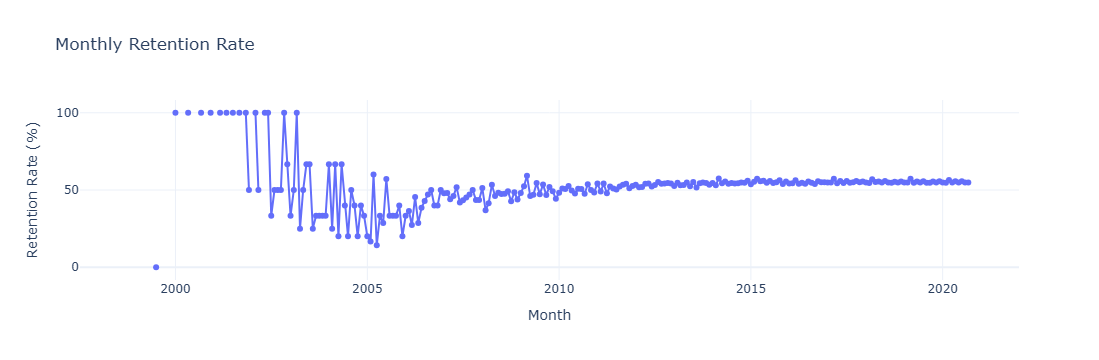

In [971]:
retention_df['month'] = retention_df['month'].astype(str)

fig = px.line(retention_df, x='month', y='retention_rate', markers=True, title='Monthly Retention Rate')

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Retention Rate (%)',
    template='plotly_white'
)

fig.update_traces(hovertemplate='Month: %{x}<br>Retention Rate: %{y:.2f}%')

fig.show()

# Анализ Стабилизации Retention

По графику видно, что после 2005 года показатель retention стабилизируется, что обусловлено появлением достаточного количества пользователей. Накопление массовой базы позволяет переходить от резких колебаний к более устойчивой динамике активности. Это свидетельствует о том, что продукт достигает зрелости, когда даже изменения в приросте новых пользователей не приводят к значительным скачкам в retention.

В период с 2010 по 2020 год, ежемесячный retention стабильно варьируется от **48% до 56%**. Это можно интерпретировать следующим образом:

- **Стабильная база пользователей:**  
  Данный диапазон показывает, что почти половина пользователей сохраняет активность каждый месяц, что является показателем высокого уровня вовлечённости и удовлетворённости продуктом. Наличие стабильной базы позволяет продукту предсказуемо планировать дальнейшие обновления и маркетинговые кампании.

- **Зрелость продукта:**  
  Когда продукт достигает определённого уровня популярности, динамика retention становится менее волатильной. Стабильные значения в указанном диапазоне свидетельствуют о том, что пользователи привыкли к продукту, и их поведение становится более предсказуемым.

- **Эффект накопления:**  
  С ростом количества пользователей даже если наблюдается некоторый отток, постоянное пополнение аудитории позволяет удерживать высокий уровень вовлечённости. Таким образом, стабильный retention в диапазоне 48–56% означает успешное сочетание привлечения и удержания игроков.

- **Показатель качества обслуживания:**  
  Стабильно высокий retention является индикатором того, что продукт эффективно удовлетворяет потребности своей аудитории, а маркетинговая и продуктовая стратегии способствуют долгосрочной лояльности пользователей.

Устойчивое значение ежемесячного retention в период с 2010 по 2020 год подтверждает, что продукт располагает лояльной и стабильной аудиторией. Это позволяет делать выводы о качественной работе продукта, его способности удовлетворять пользователей на протяжении длительного времени и служить основой для дальнейшего развития и оптимизации.


# 2. A/B test

In [973]:
test_data = pd.read_csv('C:/Users/User/DS projects/gameanalytics/data/ab_test.csv', sep = ';')
test_data

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
...,...,...,...
404765,404766,0,a
404766,404767,0,b
404767,404768,231,a
404768,404769,0,a


In [975]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404770 entries, 0 to 404769
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    404770 non-null  int64 
 1   revenue    404770 non-null  int64 
 2   testgroup  404770 non-null  object
dtypes: int64(2), object(1)
memory usage: 9.3+ MB


In [977]:
test_data.describe()

,user_id,revenue
count,404770.000000,404770.000000
mean,202385.500000,26.083435
std,116847.178567,681.652928
min,1.000000,0.000000
25%,101193.250000,0.000000
50%,202385.500000,0.000000
75%,303577.750000,0.000000
max,404770.000000,37433.000000


## Интерпретация

- Почти все наблюдения имеют значение revenue равное 0 — 25%, 50% и 75% квартилей равны 0, что указывает на то, что подавляющее большинство пользователей не генерируют доход.
- Небольшое число пользователей показывает высокие значения (до 37433), что приводит к незначительному увеличению среднего значения до 26.08, однако медиана остаётся нулевой.
- Высокое стандартное отклонение (681.65) при низком среднем свидетельствует о наличии выбросов, то есть нескольких пользователей, совершивших покупки, но их доля очень мала.

---

- **Дальнейший анализ:**  
  - Провести статистическую проверку (например, непараметрический тест или пермутационный тест) для оценки значимости различий между группами.
  - Проанализировать дополнительные показатели (например, конверсию в платящих пользователей и ARPPU), чтобы получить более полную картину эффективности промо-предложений.
  - Рассмотреть возможность сегментации пользователей, поскольку даже в группе с низким средним revenue могут быть отдельные сегменты, генерирующие высокий доход. Однако в датасете недостаточно информации для сегментации пользователей.

In [979]:
meantest = test_data.groupby('testgroup')['revenue'].mean().reset_index()
meantest

,testgroup,revenue
0,a,25.413720
1,b,26.751287


Сравнение средних в двух группах показывает, что средние различаются незначительно.

In [981]:
from scipy.stats import shapiro

group_a = test_data[test_data['testgroup'] == 'a']['revenue']
group_b = test_data[test_data['testgroup'] == 'b']['revenue']

print(f"Group A size: {len(group_a)}")
print(f"Group B size: {len(group_b)}")

stat_a, p_a = shapiro(group_a)
stat_b, p_b = shapiro(group_b)

print(f"Group A - P-value: {p_a}")
print(f"Group B - P-value: {p_b}")

Group A size: 202103
Group B size: 202667
Group A - P-value: 0.0
Group B - P-value: 0.0


### Интерпретация результатов

1. **Отказ нулевой гипотезы о нормальности:**  
   Тест Шапиро проверяет гипотезу о том, что данные имеют нормальное распределение. Значение p-value = 0.0 говорит о том, что с очень высокой статистической значимостью нулевая гипотеза отвергается. Это означает, что распределение значений (revenue) в обеих группах существенно отличается от нормального.

2. **Влияние большого размера выборки:**  
   При больших объемах данных тест Шапиро становится чрезвычайно чувствительным и может обнаруживать даже незначительные отклонения от нормального распределения. Таким образом, p-value, равное 0.0, может быть вызвано как истинной не нормальностью данных, так и высокой чувствительностью теста при наличии более 200 тыс. наблюдений в каждой группе.

In [983]:
group_a.describe()

count    202103.000000
mean         25.413720
std         920.768137
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       37433.000000
Name: revenue, dtype: float64

In [985]:
group_b.describe()

count    202667.000000
mean         26.751287
std         287.324162
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        4000.000000
Name: revenue, dtype: float64

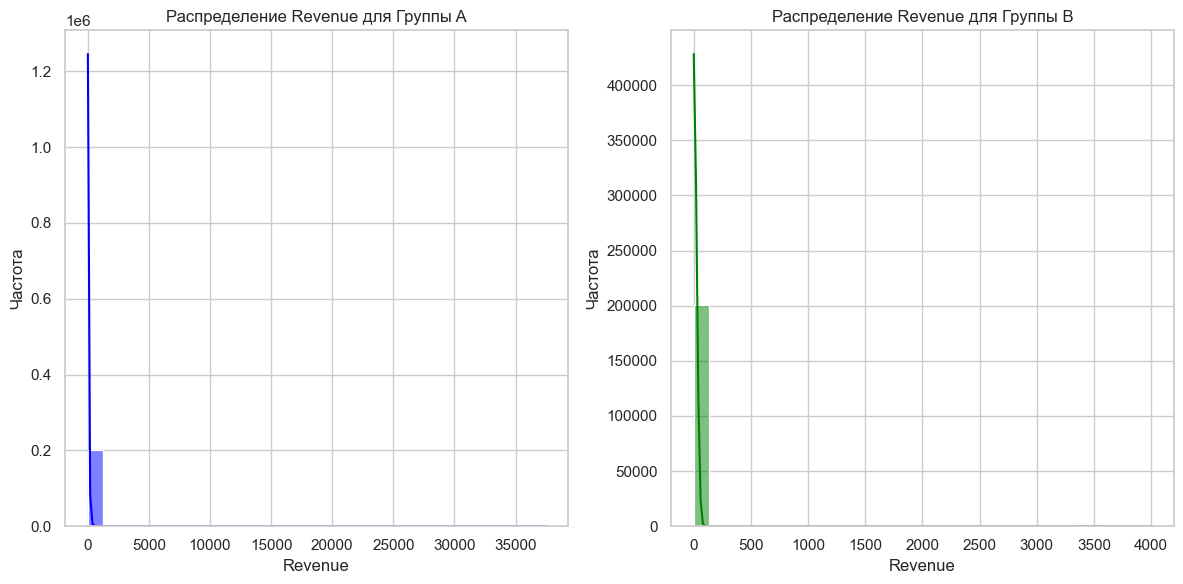

In [991]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  
sns.histplot(group_a, kde=True, color='blue', bins=30)
plt.title('Распределение Revenue для Группы A')
plt.xlabel('Revenue')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)  
sns.histplot(group_b, kde=True, color='green', bins=30)
plt.title('Распределение Revenue для Группы B')
plt.xlabel('Revenue')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

In [995]:
group_a_notzeros = group_a[group_a != 0].count()
group_b_notzeros = group_b[group_b != 0].count()

print(f"Ненулевые значения в группе A: {group_a_notzeros}, {group_a_notzeros/len(group_a)}")
print(f"Ненулевые значения в группе B: {group_b_notzeros}, {group_b_notzeros/len(group_b)}")

Ненулевые значения в группе A: 1928, 0.009539690157988749
Ненулевые значения в группе B: 1805, 0.008906235351586593


Конверсия платящих пользователей показывает, что:
- Группа A имеет немного более высокий процент платящих пользователей, что может свидетельствовать о лучшей монетизации или более эффективной стимуляции покупок.
- Хотя процент платящих невысок (всего около 1%), даже незначительные различия важны для оценки эффективности предложенных промо-мероприятий и дальнейшей оптимизации продукта.

In [989]:
import numpy as np
from mlxtend.evaluate import permutation_test

p_val = permutation_test(
    group_a,
    group_b,
    method='approximate',  
    num_rounds=10000,       
)

print("p-value:", p_val)

p-value: 0.5215478452154785


Пермутационный тест — это непараметрический метод статистического анализа, который не требует предположений о нормальном распределении данных. Его выбор обусловлен следующими причинами:

- **Отсутствие нормальности:** Если данные не удовлетворяют предположениям о нормальном распределении (например, как показал тест Шапиро), применение параметрических тестов может быть некорректным.
- **Надёжность при большом размере выборки:** Даже при больших выборках пермутационный тест остаётся устойчивым к небольшим отклонениям от нормальности.
- **Гибкость метода:** Он позволяет оценить, насколько наблюдаемая разница между группами может быть обусловлена случайными вариациями в данных, путём случайного перемешивания меток групп.

Таким образом, метод пермутаций выбран для сравнения групп `group_a` и `group_b` с целью получения достоверной оценки разницы между ними без предположения о типичном распределении.

## Результаты теста и их интерпретация

Выполнив тест, мы получили следующий результат:

- **p-value:** 0.5215478452154785

**Интерпретация:**

- **Нулевая гипотеза (H₀):** Различий между группами `group_a` и `group_b` нет, а наблюдаемое различие обусловлено случайными факторами.
- **Вывод:** Мы не можем отвергнуть нулевую гипотезу. Это означает, что статистически значимых различий между группами по рассматриваемой метрике нет, и наблюдаемая разница вполне может быть результатом случайных колебаний.

## Заключение

Использование пермутационного теста позволило надёжно оценить различия между группами, не полагаясь на предположения о нормальности распределения данных. Поскольку p-value ≈ 0.522, мы делаем вывод, что разница между группами `group_a` и `group_b` не является статистически значимой.

In [795]:
paying_users = test_data[test_data['revenue'] > 0]
paying_users

,user_id,revenue,testgroup
72,73,351,a
160,161,3797,b
341,342,290,a
377,378,3768,b
385,386,250,a
...,...,...,...
404315,404316,262,a
404525,404526,3120,b
404543,404544,369,a
404602,404603,251,a


In [798]:
group_pay_a = paying_users[paying_users['testgroup'] == 'a']['revenue'] 
group_pay_b = paying_users[paying_users['testgroup'] == 'b']['revenue']

print(f"Количество платящих в группе A: {len(group_pay_a)}")
print(f"Количество платящих в группе B: {len(group_pay_b)}")

Количество платящих в группе A: 1928
Количество платящих в группе B: 1805


In [800]:
paymeantest = paying_users.groupby('testgroup')['revenue'].mean().reset_index()
paymeantest

,testgroup,revenue
0,a,2663.998444
1,b,3003.658172


In [802]:
stat_a, p_a = shapiro(group_pay_a)
stat_b, p_b = shapiro(group_pay_b)

print(f"Group A (paying) - P-value: {p_a}")
print(f"Group B (paying) - P-value: {p_b}")

Group A (paying) - P-value: 0.0
Group B (paying) - P-value: 2.4929213770979496e-22


Отклоняем гипотезу о нормальном распределении в обеих группах.

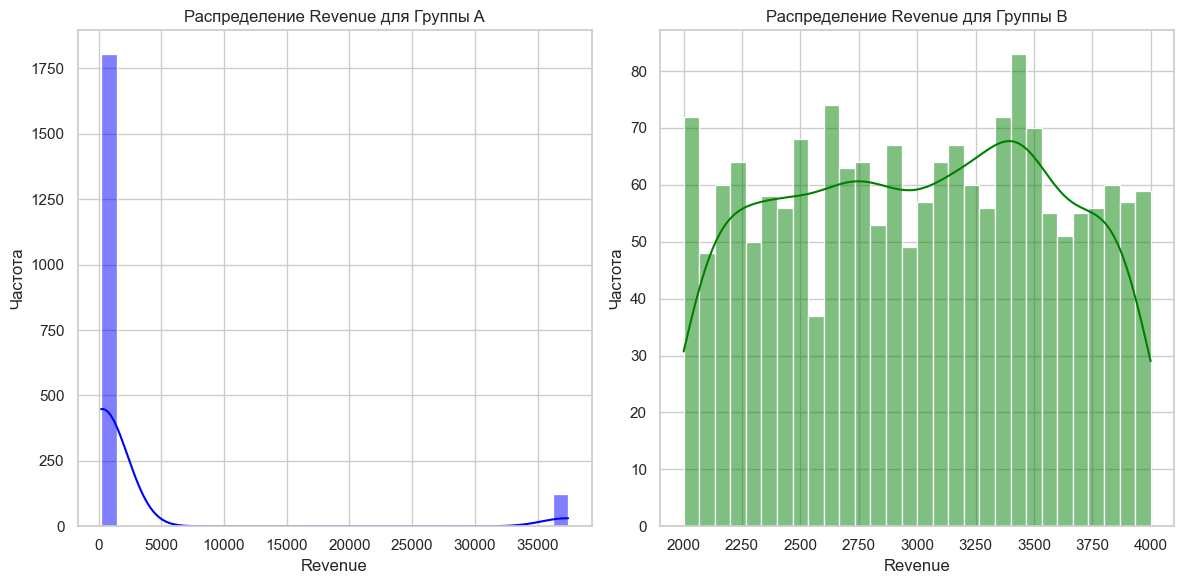

In [804]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  
sns.histplot(group_pay_a, kde=True, color='blue', bins=30)
plt.title('Распределение Revenue для Группы A')
plt.xlabel('Revenue')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)  
sns.histplot(group_pay_b, kde=True, color='green', bins=30)
plt.title('Распределение Revenue для Группы B')
plt.xlabel('Revenue')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

In [896]:
p_val = permutation_test(
    group_pay_a,
    group_pay_b,
    method='approximate',   
    num_rounds=10000,       
    seed=42                 
)

print("p-value:", p_val)

p-value: 0.11068893110688931


Различий между группами group_a и group_b нет, а наблюдаемое различие обусловлено случайными факторами.

### Фильтрация Выбросов с Помощью Межквартильного Размаха (IQR)

Преимущества фильтрации выбросов с IQR

- **Повышение качества анализа:**  
  Выбросы могут существенно исказить оценку центральных показателей (таких как среднее значение) и распределения данных. Удаление выбросов помогает получить более точное представление о типичных значениях и основных тенденциях в наборе данных.

- **Улучшение надежности статистических тестов:**  
  Многие методы статистического анализа чувствительны к экстремальным значениям. Фильтрация выбросов позволяет снизить влияние аномальных точек, что ведет к более корректным результатам при проведении гипотезных тестов и построении моделей.


In [839]:
q1_a = np.percentile(group_pay_a, 25)  
q3_a = np.percentile(group_pay_a, 75)  
iqr_a = q3 - q1 

lower_bound_a = q1_a - 1.5 * iqr_a
upper_bound_a = q3_a + 1.5 * iqr_a

filtered_data_a = [x for x in group_pay_a if x >= lower_bound_a and x <= upper_bound_a]

q1_b = np.percentile(group_pay_b, 25)  
q3_b = np.percentile(group_pay_b, 75) 
iqr_b = q3_b - q1_b 

lower_bound_b = q1_b - 1.5 * iqr_b
upper_bound_b = q3_b + 1.5 * iqr_b

filtered_data_b = [x for x in group_pay_b if x >= lower_bound_b and x <= upper_bound_b]

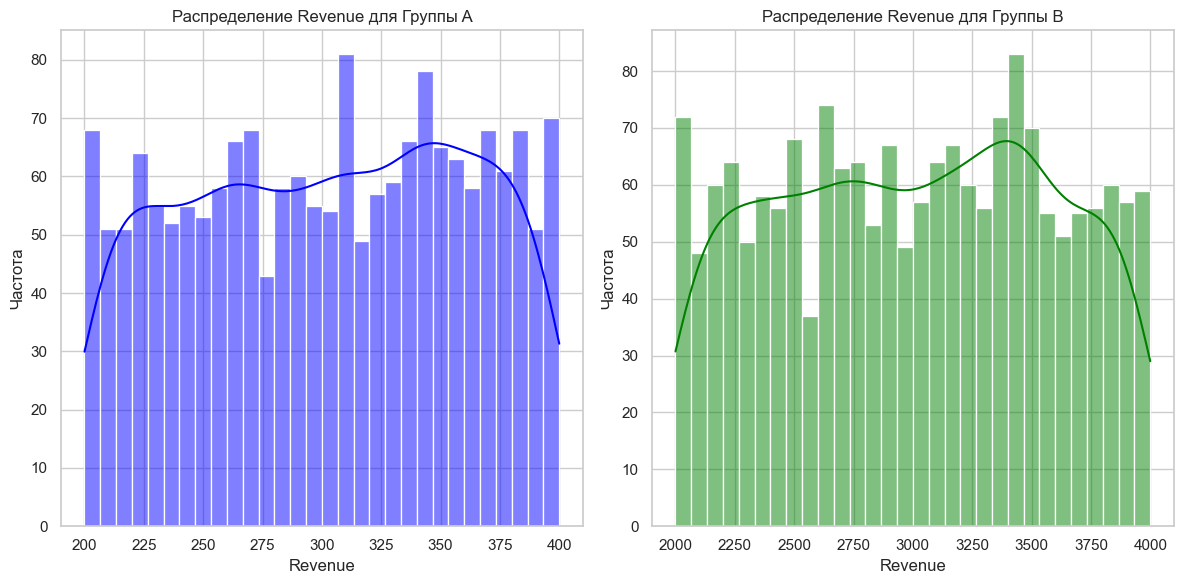

In [841]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  
sns.histplot(filtered_data_a, kde=True, color='blue', bins=30)
plt.title('Распределение Revenue для Группы A')
plt.xlabel('Revenue')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)  # Второй график
sns.histplot(filtered_data_b, kde=True, color='green', bins=30)
plt.title('Распределение Revenue для Группы B')
plt.xlabel('Revenue')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

In [842]:
stat_a, p_a = shapiro(filtered_data_a)
stat_b, p_b = shapiro(filtered_data_b)

print(f"Group A (paying) - P-value: {p_a}")
print(f"Group B (paying) - P-value: {p_b}")

Group A (paying) - P-value: 3.002848260644267e-23
Group B (paying) - P-value: 2.4929213770979496e-22


Отклоняем гипотезу о нормальном распределении в обеих группах.

In [847]:
mean_a = sum(filtered_data_a)/ len(filtered_data_a)
mean_b = sum(filtered_data_b)/ len(filtered_data_b)

print(f"Среднее A: {mean_a}")
print(f"Среднее B {mean_b}")

Среднее A: 302.45817174515236
Среднее B 3003.6581717451522


In [892]:
p_val = permutation_test(
    filtered_data_a,
    filtered_data_b,
    method='approximate',   
    num_rounds=10000,       
    seed=42                 
)

print("p-value:", p_val)

p-value: 9.999000099990002e-05


На основании полученного p-value (~0.0001) можно заключить, что между "filtered_data_a" и "filtered_data_b" существует статистически значимая разница. 

# Общий Анализ A/B тестирования

В данном A/B тестировании была оценена эффективность различных промо-стратегий (или оферт) по нескольким ключевым метрикам, среди которых основными являются:

- **Revenue (доход):** Анализ распределения и уровня дохода, генерируемого пользователями.  
- **Конверсия в платящих пользователей (платящая конверсия):** Доля пользователей, которые совершили покупку (имеют ненулевые значения revenue) от общего числа пользователей.
- **ARPU / ARPPU:** Средний доход на пользователя и на платящего пользователя соответственно.

---

## Основные результаты анализа

1. **Дескриптивная статистика по Revenue:**
   - При первичном анализе было выявлено, чо огромная доля пользователей не генерирует доход (около 1%). 
  
2. **Проверка распределения (тест Шапиро):**
   - Тест Шапиро для обеих групп показал p-value равное 0, что свидетельствует о значительном отклонении распределения значений от нормального. Это обосновывает применение непараметрических методов для дальнейшего анализа.

3. **Фильтрация выбросов:**

   - По итогу a/b тестирования метрик ARPU / ARPPU, тестовая и контрольная группы не имели статистически значимых различий по данным метрикам.
   - С помощью метода межквартильного размаха (IQR) были удалены экстремальные наблюдения, что позволило получить более "чистые" данные (filtered_data_a и filtered_data_b) для сравнения.

5. **Пермутационный тест:**
   - На основе отфильтрованных данных был проведён пермутационный тест с 10 000 перестановками (num_rounds=10000, seed=42).
   - Полученное p-value ≈ 9.999e-05 (примерно 0.0001) указывает на статистически значимую разницу между группами. То есть вероятность случайного возникновения разницы между группами составляет менее 0.01%, что позволяет с высокой уверенностью отвергнуть нулевую гипотезу о равенстве распределений.

---

## Выводы

- **Статистическая значимость разницы:**  
  p-value ≈ 0.0001 значительно ниже стандартного порога 0.05, что означает, что различия в доходе между группами не случайны, а отражают реальные различия, вероятно связанные с разными промо-стратегиями.

- **Эффективность промо-стратегии:**  
  Нельзя рекомендовать использовать условия, применяемые в данной группе. Следует провести дополнительное исследование: сегментировать пользователей для более точного анализа.

# 3. Оценка эффективности события "Растения и Сады"

Этот документ описывает методику оценки успеха временного игрового события, в рамках которого игроки могут зарабатывать уникальные награды. Событие предполагает выполнение уровней для получения эксклюзивных предметов, бонусов или монет, а также содержит вариацию, где за неудачные попытки игроки могут быть отправлены назад (штраф).

---

## 1. Базовые KPI для стандартного события

Перед внедрением штрафного механизма важно зафиксировать следующие ключевые показатели (KPI):

- **Уровень участия (Participation Rate):**  
  _Определение:_ Доля игроков, участвующих в событии, относительно общей базы.  
  _Зачем:_ Высокая вовлечённость свидетельствует об интересе аудитории.

- **Конверсия / Коэффициент завершения (Conversion / Event Completion Rate):**  
  _Определение:_ Процент игроков, прошедших значимую часть уровней или завершивших событие.  
  _Зачем:_ Показатель доступности и привлекательности события.

- **Средний прогресс (Average Levels Completed):**  
  _Определение:_ Среднее количество пройденных уровней за время события.  
  _Зачем:_ Указывает на вовлечённость игроков и выявляет возможные проблемы с уровнем сложности.

- **Коэффициент получения наград (Reward Redemption Rate):**  
  _Определение:_ Доля игроков, получивших и/или активировавших эксклюзивные награды.  
  _Зачем:_ Демонстрирует привлекательность и ценность наград.

- **Время вовлечённости (Engagement Time):**  
  _Определение:_ Среднее время, которое игроки тратят на участие в событии.  
  _Зачем:_ Длительная вовлечённость усиливает связь с игрой и может положительно влиять на монетизацию.

- **Дополнительные метрики (при наличии монетизации):**  
  Например, дополнительный доход (ARPU) или число покупок внутри игры.

---

## 2. Адаптация метрик для версии с штрафом

При внедрении механизма, когда игроки за неудачные попытки "отправляются назад", важно дополнительно учитывать:

- **Частота применения штрафов (Penalty Incidence Rate):**  
  _Определение:_ Доля попыток или участников, получивших штраф.  
  _Зачем:_ Позволяет оценить, насколько часто применяется штраф и не слишком ли он суровый.

- **Средняя тяжесть штрафа / Время восстановления (Average Penalty Severity / Recovery Time):**  
  _Определение:_ Среднее число уровней, на которые игрок откатывается, или среднее время на восстановление прогресса.  
  _Зачем:_ Слишком высокое значение может демотивировать игроков.

- **Скорректированные показатели конверсии и завершения:**  
  _Определение:_ Сравнение конверсии стандартной и штрафной версий события.  
  _Зачем:_ Чтобы понять влияние штрафа на общий показатель завершения.

- **Показатель оттока (Drop-Off Rate) после штрафа:**  
  _Определение:_ Доля игроков, прекращающих участие после получения штрафа.  
  _Зачем:_ Высокий отток может сигнализировать о негативном восприятии штрафного механизма.

- **Изменение продолжительности сессии (Session Duration):**  
  _Определение:_ Среднее время прохождения события до и после внедрения штрафа.  
  _Зачем:_ Сокращение сессии может говорить о потере интереса из-за штрафов.

---

## 3. Рекомендации по проведению анализа

1. **Сбор данных и предварительный анализ:**  
   - Загрузите данные (например, через систему логирования или аналитическую платформу).  
   - Разбейте игроков на две группы: стандартное событие и событие с штрафом.

2. **Расчёт метрик:**  
   - Вычислите базовые показатели (участие, конверсию, прогресс, вовлечённость, получение наград) для каждой группы.  
   - Дополнительно рассчитайте метрики, связанные с штрафами: частоту, тяжесть, отток после штрафа, изменение времени сессии.

3. **Сравнительный анализ (A/B тестирование):**  
   - Проведите статистическое сравнение между группами.  
   - Используйте сегментацию (например, активно играющие vs. казуальные) для выявления особенностей восприятия штрафов.

4. **Интерпретация результатов:**  
   - Если в версии с штрафом конверсия снижается, а отток увеличивается, система штрафов, возможно, слишком жесткая.  
   - Если коммерческие метрики (ARPU, получение наград) остаются высокими, штраф может повысить ценность наград за счёт усложнения игры.

5. **Корректировки:**  
   - На основе анализа скорректируйте уровень штрафов, оставляя вызов, но избегая демотивации.  
   - Соберите обратную связь от игроков (опросы, отзывы) для дополнительной оптимизации.

---

## Итог

**Стандартное событие:**  
- Измеряйте участие, конверсию/завершение, средний прогресс, вовлечённость и коэффициент получения наград.

**Событие с штрафом:**  
- Дополнительно отслеживайте:  
  - Частоту и тяжесть штрафов,  
  - Изменения конверсии и оттока,  
  - Изменения времени прохождения.

Анализ этих метрик (с использованием A/B тестирования, сегментации и обратной связи) позволит получить полное представление об эффективности проведения события. Это, в свою очередь, поможет оптимизировать игровой процесс и найти баланс между вызовом и удовольствием от игры.

---

*Примечание:* План можно адаптировать в зависимости от специфики игры, доступных источников данных и поставленных целей.
